In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv('../../datasets/built_dataset.csv')
ds.head()

,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,green hot peppers,capsicum,2021-01-01,09:14:26.212,102900005116226,1.132,25.8,sale,No
1,green hot peppers,capsicum,2021-01-01,09:14:26.324,102900005116226,0.593,25.8,sale,No
2,yunnan lettuces,flower,2021-01-01,09:16:20.074,102900005115984,0.468,6.0,sale,No
3,xixia mushroom,mushroom,2021-01-01,09:18:49.451,102900005116530,0.389,18.0,sale,No
4,paopaojiao,capsicum,2021-01-01,09:19:14.842,102900005117056,0.606,18.0,sale,No


In [3]:
#Checking the missing values
ds.isnull()

,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
475423,False,False,False,False,False,False,False,False,False
475424,False,False,False,False,False,False,False,False,False
475425,False,False,False,False,False,False,False,False,False
475426,False,False,False,False,False,False,False,False,False


In [5]:
#Checking the sum of missing value for each column
ds.isnull().sum()

Item Name                      0
Category Name                  0
Date                           0
Time                           0
Item Code                      0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
dtype: int64

In [7]:
# Check the duplicate data 
ds.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
475423    False
475424    False
475425    False
475426    False
475427    False
Length: 475428, dtype: bool

In [9]:
# Remove the seconds and milliseconds in time 
ds['Time'] = ds['Time'].apply(lambda x: x.split(':')[0] + ':' + x.split(':')[1])
ds

,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,green hot peppers,capsicum,2021-01-01,09:14,102900005116226,1.132,25.8,sale,No
1,green hot peppers,capsicum,2021-01-01,09:14,102900005116226,0.593,25.8,sale,No
2,yunnan lettuces,flower,2021-01-01,09:16,102900005115984,0.468,6.0,sale,No
3,xixia mushroom,mushroom,2021-01-01,09:18,102900005116530,0.389,18.0,sale,No
4,paopaojiao,capsicum,2021-01-01,09:19,102900005117056,0.606,18.0,sale,No
...,...,...,...,...,...,...,...,...,...
475423,luosi pepper,capsicum,2022-12-31,21:30,102900011032251,1.000,1.5,sale,Yes
475424,wawacai,flower,2022-12-31,21:30,102900005118831,1.000,2.1,sale,Yes
475425,yunnan lettuce,flower,2022-12-31,21:32,102900011030059,1.000,2.7,sale,Yes
475426,wawacai,flower,2022-12-31,21:38,102900005118831,1.000,3.5,sale,No


In [12]:
# Check the values of each category name
ds['Category Name'].value_counts()

Category Name
flower      203383
capsicum    131143
mushroom     60398
aquatic      37928
solanum      26788
cabbage      15788
Name: count, dtype: int64

In [14]:
# Check the year range 
ds['Date'].min(),ds['Date'].max()

('2021-01-01', '2022-12-31')

In [15]:
# 2021 sales
ds['Date'] = pd.to_datetime(ds['Date'])
ds_2021 = ds[ds['Date'].dt.year == 2021]
ds_2021

,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,green hot peppers,capsicum,2021-01-01,09:14,102900005116226,1.132,25.8,sale,No
1,green hot peppers,capsicum,2021-01-01,09:14,102900005116226,0.593,25.8,sale,No
2,yunnan lettuces,flower,2021-01-01,09:16,102900005115984,0.468,6.0,sale,No
3,xixia mushroom,mushroom,2021-01-01,09:18,102900005116530,0.389,18.0,sale,No
4,paopaojiao,capsicum,2021-01-01,09:19,102900005117056,0.606,18.0,sale,No
...,...,...,...,...,...,...,...,...,...
262579,luosi pepper,capsicum,2021-12-31,21:44,102900011000328,0.192,12.0,sale,No
262580,xixia mushroom,mushroom,2021-12-31,21:50,102900005116530,0.244,14.0,sale,No
262581,millet pepper,capsicum,2021-12-31,21:58,102900011031100,1.000,6.9,sale,No
262582,millet pepper,capsicum,2021-12-31,21:58,102900011031100,1.000,6.9,sale,No


In [34]:
# 2022 sales
ds['Date'] = pd.to_datetime(ds['Date'])
ds_2022 = ds[ds['Date'].dt.year == 2022]
ds_2022

,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
262584,net lotus root,aquatic,2022-01-01,09:15,102900005116899,0.470,6.0,sale,No
262585,wuhu green pepper,capsicum,2022-01-01,09:17,102900011016701,0.206,7.8,sale,No
262586,caixin,flower,2022-01-01,09:20,102900005115908,0.302,6.0,sale,No
262587,xixia mushroom,mushroom,2022-01-01,09:23,102900005116530,0.401,14.0,sale,No
262588,shanghaiqing,flower,2022-01-01,09:28,102900005115823,0.484,5.0,sale,No
...,...,...,...,...,...,...,...,...,...
475423,luosi pepper,capsicum,2022-12-31,21:30,102900011032251,1.000,1.5,sale,Yes
475424,wawacai,flower,2022-12-31,21:30,102900005118831,1.000,2.1,sale,Yes
475425,yunnan lettuce,flower,2022-12-31,21:32,102900011030059,1.000,2.7,sale,Yes
475426,wawacai,flower,2022-12-31,21:38,102900005118831,1.000,3.5,sale,No


In [35]:
# Monthly sales Quantity Sold (kilo) in 2021
sales_data_2021 = ds_2021.groupby(ds_2021['Date'].dt.month)['Quantity Sold (kilo)'].sum().reset_index().rename(columns = {"Date" : "Month"}).round(0).astype('int')
sales_data_2021

,Month,Quantity Sold (kilo)
0,1,10225
1,2,13237
2,3,9738
3,4,8464
4,5,9173
5,6,8430
6,7,9439
7,8,11931
8,9,8886
9,10,8120


In [36]:
# Monthly sales Quantity Sold (kilo) in 2022
sales_data_2022 = ds_2022.groupby(ds_2022['Date'].dt.month)['Quantity Sold (kilo)'].sum().reset_index().rename(columns = {"Date" : "Month"}).round(0).astype('int')
sales_data_2022

,Month,Quantity Sold (kilo)
0,1,10471
1,2,7473
2,3,7208
3,4,6764
4,5,6348
5,6,6875
6,7,10576
7,8,18219
8,9,13221
9,10,16110


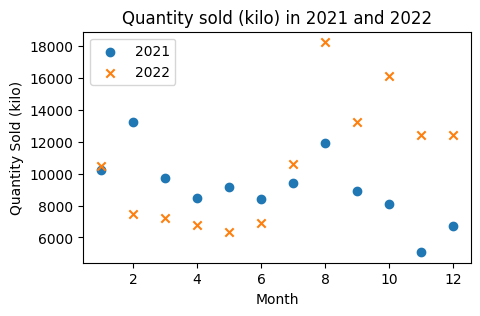

In [48]:
# Plotting the scatter plot for 2021 and 2022 on the same plot
plt.figure(figsize=(5, 3))
plt.scatter(sales_data_2021['Month'], sales_data_2021['Quantity Sold (kilo)'], label='2021', marker='o')
plt.scatter(sales_data_2022['Month'], sales_data_2022['Quantity Sold (kilo)'], label='2022', marker='x')

plt.title('Quantity sold (kilo) in 2021 and 2022')
plt.xlabel('Month')
plt.ylabel('Quantity Sold (kilo)')
plt.legend()
plt.show()